In [27]:
%matplotlib inline
import numpy as np
import pandas as pd 

from scipy import stats
from matplotlib import pyplot as plt

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
genes_df = pd.read_csv('082919_img_CAs_dabs.csv', index_col=0)

In [17]:
is_ca = np.array([str(e).startswith('EC:4.2.1.1') for e in genes_df.Enzyme])
is_dab1 = np.array([str(e).startswith('pfam10070') for e in genes_df.Pfam])
genes_df['is_ca'] = is_ca
genes_df['is_dab1'] = is_dab1

In [22]:
grouped_by_org = genes_df.groupby('Genome ID')

In [32]:
counts = grouped_by_org.sum()

stats.pearsonr(counts.is_ca > 0, counts.is_dab1 > 0)

(-0.4998032092185303, 0.0)

In [29]:
counts.is_dab1

Genome ID
637000001     5
637000002     2
637000004     1
637000005     1
637000007     1
637000010     1
637000012     2
637000013     2
637000014     2
637000015     2
637000016     2
637000017     2
637000018     2
637000019     2
637000020     2
637000023     2
637000024     1
637000025     1
637000026     1
637000027     1
637000030     2
637000031     1
637000032     2
637000033     2
637000034     1
637000038     5
637000039     1
637000040     2
637000041     2
637000042     2
             ..
2833001199    6
2833005253    1
2833007721    1
2833011970    1
2833015273    1
2833019317    3
2833022550    1
2833026118    1
2833028006    1
2833047623    1
2833052049    1
2833053935    2
2833059440    1
2833062151    2
2833065481    2
2833575075    2
2833584432    1
2833589111    1
2833593252    1
2833596614    1
2833601699    1
2833607222    2
2833611726    1
2833616669    2
2833620646    6
2833627981    5
2833634935    2
2833640130    2
2833644256    2
2833647300    4
Name: is_dab1,

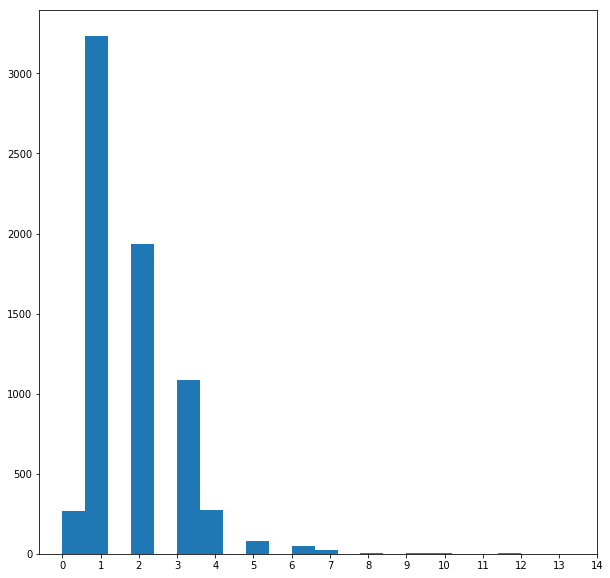

In [36]:
plt.figure(figsize=(10,10))
plt.hist(counts.is_ca, bins=20)
plt.xticks(np.arange(15))
plt.show()

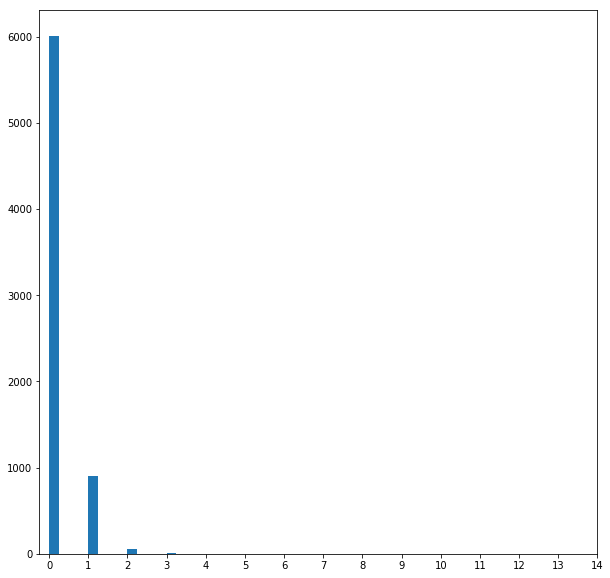

In [38]:
plt.figure(figsize=(10,10))
plt.hist(counts.is_dab1, bins=20)
plt.xticks(np.arange(15))
plt.show()

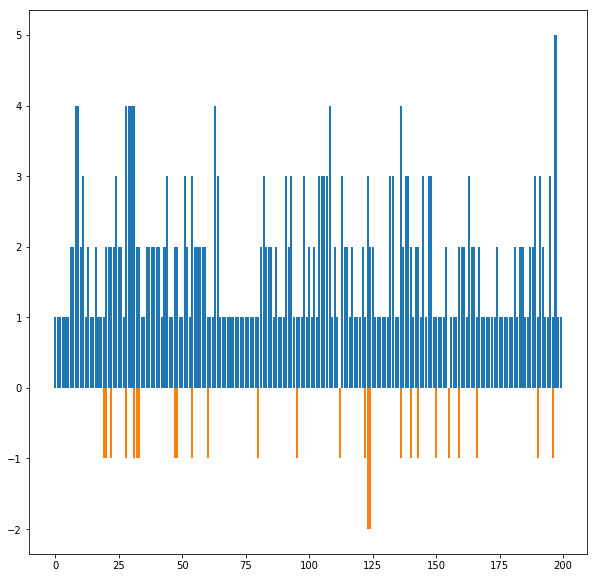

In [46]:
plt.figure(figsize=(10,10))
plt.bar(np.arange(200), counts.is_ca[200:400])
plt.bar(np.arange(200), -counts.is_dab1[200:400])
plt.show()

In [55]:
which_genomes = np.logical_and(counts.is_dab1 > 0, counts.is_ca == 0)
genomes_wdab1_only = counts[which_genomes].index
dab_no_ca_genes = genes_df[genes_df['Genome ID'].isin(genomes_wdab1_only)]

In [67]:
set([' '.join(n.split()[:2]) for n in dab_no_ca_genes['Genome Name']])

{'Acidihalobacter ferrooxidans',
 'Acidithiobacillus caldus',
 'Aeribacillus pallidus',
 'Algoriphagus sp.',
 'Alicyclobacillus acidocaldarius',
 'Anoxybacillus sp.',
 'Aquifex aeolicus',
 'Chloroflexus aggregans',
 'Chloroflexus aurantiacus',
 'Chloroflexus islandicus',
 'Geobacillus kaustophilus',
 'Geobacillus lituanicus',
 'Geobacillus sp.',
 'Geobacillus stearothermophilus',
 'Geobacillus subterraneus',
 'Geobacillus thermocatenulatus',
 'Geobacillus thermodenitrificans',
 'Geobacillus thermoleovorans',
 'Halothiobacillus neapolitanus',
 'Halothiobacillus sp.',
 'Hydrogenobacter thermophilus',
 'Hydrogenobaculum sp.',
 'Isosphaera pallida',
 'Kangiella sediminilitoris',
 'Marinithermus hydrothermalis',
 'Nitrospira japonica',
 'Nitrospira moscoviensis',
 'Parageobacillus genomosp.',
 'Rhodobaca barguzinensis',
 'Rummeliibacillus stabekisii',
 'Salinibacter ruber',
 'Staphylococcus argenteus',
 'Staphylococcus aureus',
 'Staphylococcus capitis',
 'Staphylococcus cohnii',
 'Staphylo

In [71]:
genes_df[genes_df.is_ca].Pfam.unique()

array(['pfam00484 - Pro_CA<br/><br/>',
       'pfam00916 - Sulfate_transp<br/><br/>pfam00484 - Pro_CA<br/><br/>',
       'pfam00194 - Carb_anhydrase<br/><br/>', nan,
       'pfam00484 - Pro_CA<br/><br/>pfam00916 - Sulfate_transp<br/><br/>',
       'pfam00484 - Pro_CA<br/><br/>pfam06803 - DUF1232<br/><br/>',
       'pfam07589 - VPEP<br/><br/>pfam00194 - Carb_anhydrase<br/><br/>',
       'pfam10518 - TAT_signal<br/><br/>pfam00484 - Pro_CA<br/><br/>',
       'pfam00916 - Sulfate_transp<br/><br/>',
       'pfam00583 - Acetyltransf_1<br/><br/>pfam00484 - Pro_CA<br/><br/>',
       'pfam06803 - DUF1232<br/><br/>pfam00484 - Pro_CA<br/><br/>',
       'pfam00484 - Pro_CA<br/><br/>pfam04945 - YHS<br/><br/>',
       'pfam00484 - Pro_CA<br/><br/>pfam01740 - STAS<br/><br/>pfam00916 - Sulfate_transp<br/><br/>',
       'pfam00583 - Acetyltransf_1<br/><br/>',
       'pfam00484 - Pro_CA<br/><br/>pfam00583 - Acetyltransf_1<br/><br/>',
       'pfam00484 - Pro_CA<br/><br/>pfam00916 - Sulfate_transp<br/><br

In [75]:
mask = counts.is_ca > 0
counts[mask].is_ca.mean()
counts[mask].is_ca.std()

1.1014520023062395

In [ ]:
counts.is_ca.mean()
